# Loading data and importing libraries.

In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import missingno as msno

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import missingno as msno

# Displaying Data information

In [30]:
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1360,186,336,16783.292207
1,2,4272,154,444,32188.041901
2,3,3592,1599,59,8300.987071
3,4,966,1923,244,35075.366768
4,5,4926,1301,167,37550.335232
...,...,...,...,...,...
945,946,3835,559,131,32166.080970
946,947,4650,1799,452,18853.357683
947,948,1981,400,208,15466.848322
948,949,2401,1018,237,44095.331966


In [31]:
df.drop(df.columns[[0]], axis = 1, inplace = True)                  # Removing store ID information.

In [32]:
df.info()               # Showing the store information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Store_Area            950 non-null    int64  
 1   Items_Available       950 non-null    int64  
 2   Daily_Customer_Count  950 non-null    int64  
 3   Store_Sales           950 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 29.8 KB


# Exploratory data analysis.

In [33]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,950.000000,950.000000,950.000000,950.000000
mean,2805.124211,1042.032632,272.266316,26031.558555
std,1252.494837,543.756066,128.908932,14328.792604
min,503.000000,101.000000,50.000000,1009.231578
25%,1743.000000,576.250000,167.000000,13473.868995
50%,2834.000000,1046.000000,272.000000,26834.241619
75%,3842.750000,1489.000000,382.000000,38363.703147
max,4999.000000,1997.000000,499.000000,49985.976404


# Checking if there are any outliers in the form of very small and very large supermarkets . Now analysing the gaps in the data.

<Axes: >

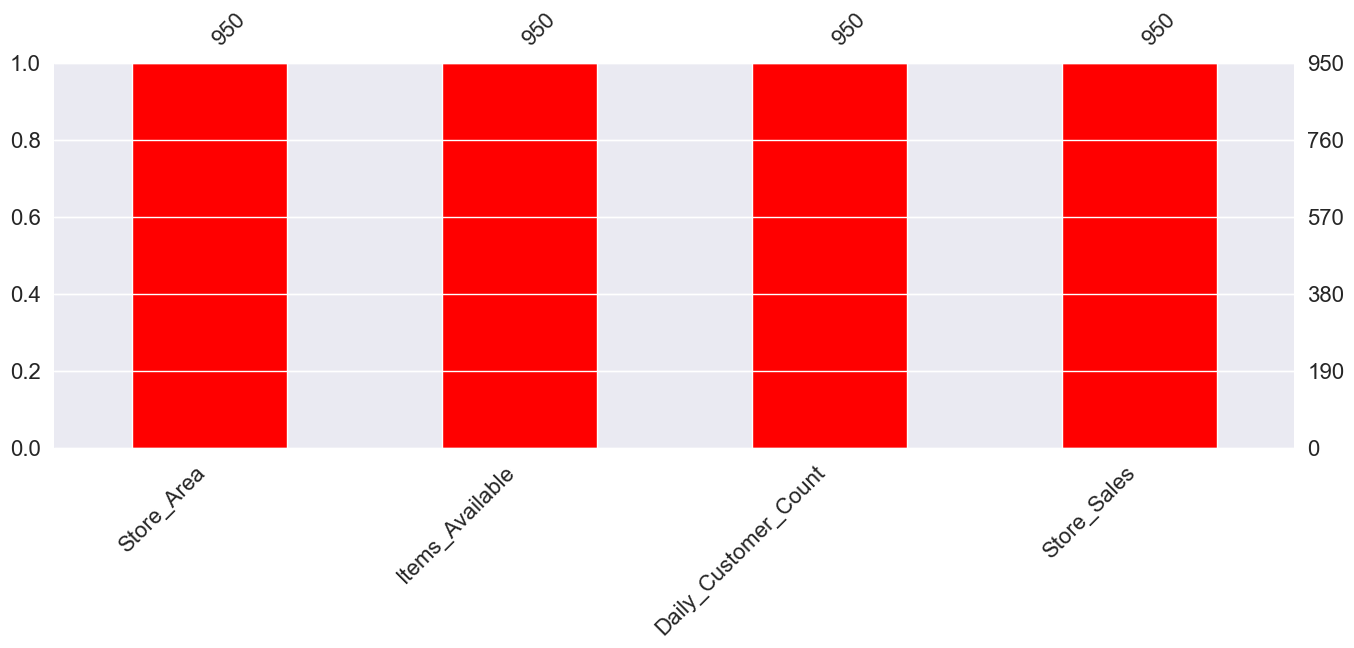

In [34]:
msno.bar(df, figsize = (16,5), color = "red")

# There are no gaps in the data, so checking the data for presence of categorical features

In [35]:
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name, unique_values=unique_values))

Feature 'Store_Area' has '855' unique values
Feature 'Items_Available' has '732' unique values
Feature 'Daily_Customer_Count' has '400' unique values
Feature 'Store_Sales' has '950' unique values


In [36]:
# Analyzing the distribution of features.


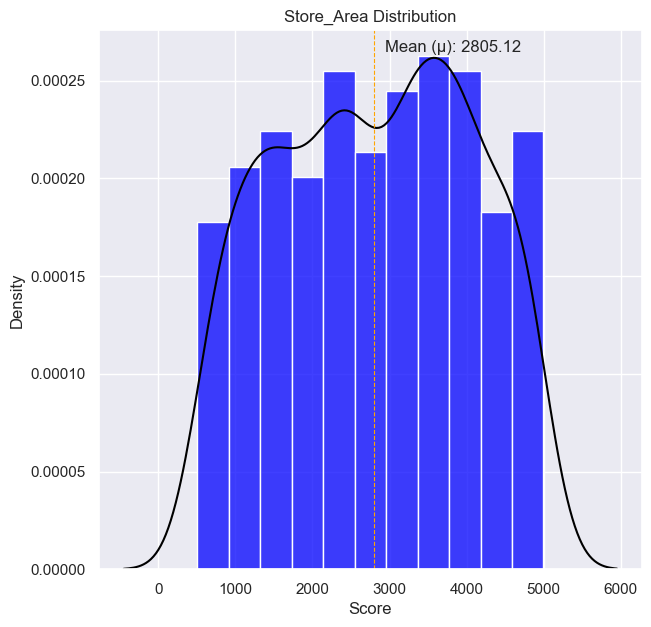

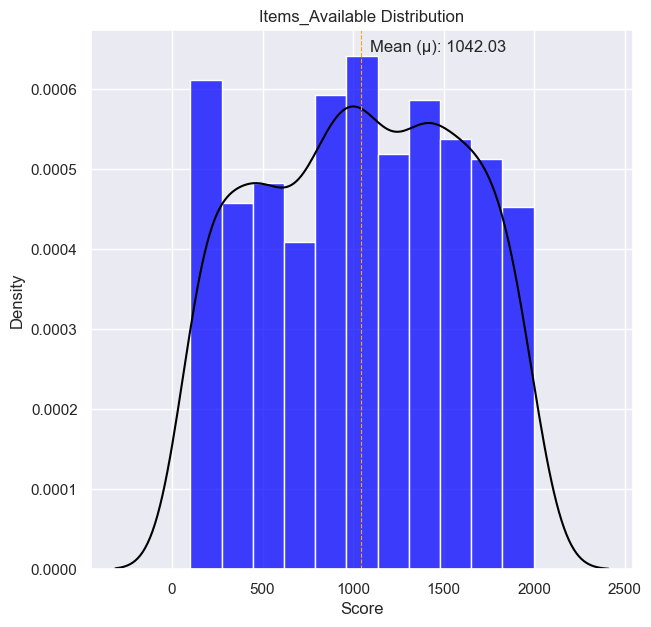

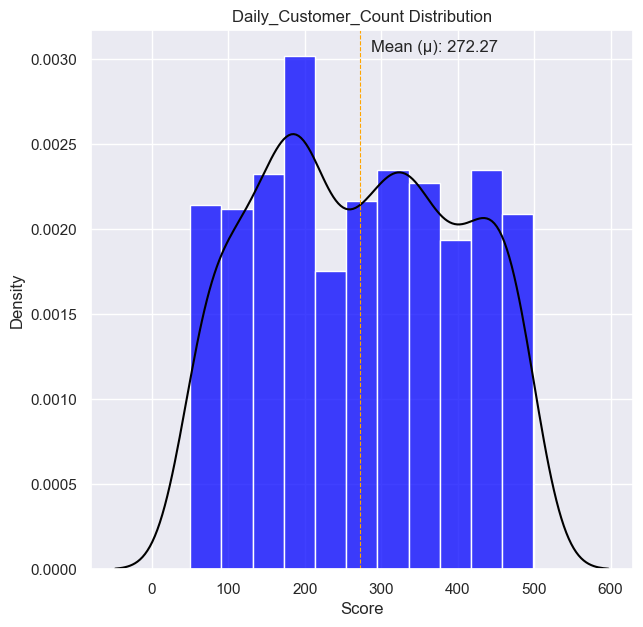

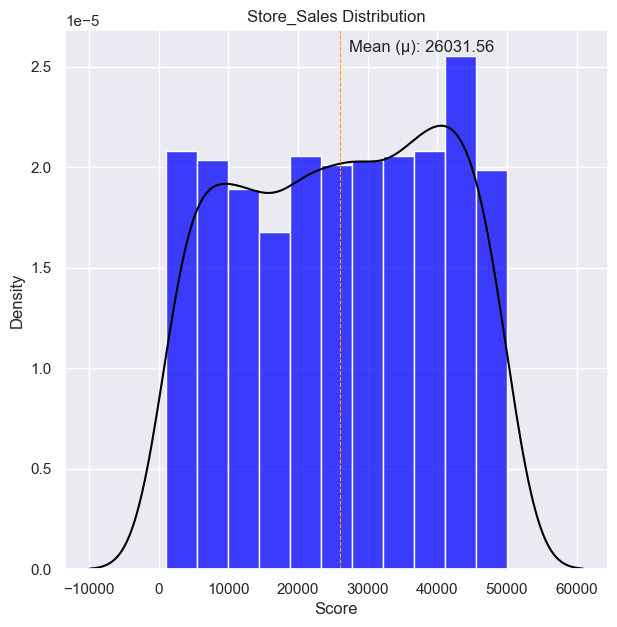

In [37]:
for column_name in df.columns:
    plt.figure(figsize=(7,7))
    plt.title("{column_name} Distribution".format(column_name = column_name))
    sns.histplot(df[column_name], stat='density',color='blue')
    sns.kdeplot(df[column_name], color='black')
    plt.axvline(df[column_name].mean(), color = 'orange', linestyle = '--', linewidth=0.8 )
    min_ylim, max_ylim = plt.ylim()
    plt.text(df[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df[column_name].mean()))
    plt.xlabel("Score")
    plt.ylabel("Density")
    plt.show()


In [38]:
# Normal Distribution? Look at the mutual relationship between features.


# Generating a pairwise scatter plot with regression lines for all numerical variables in df, using KDE plots on the diagonals.


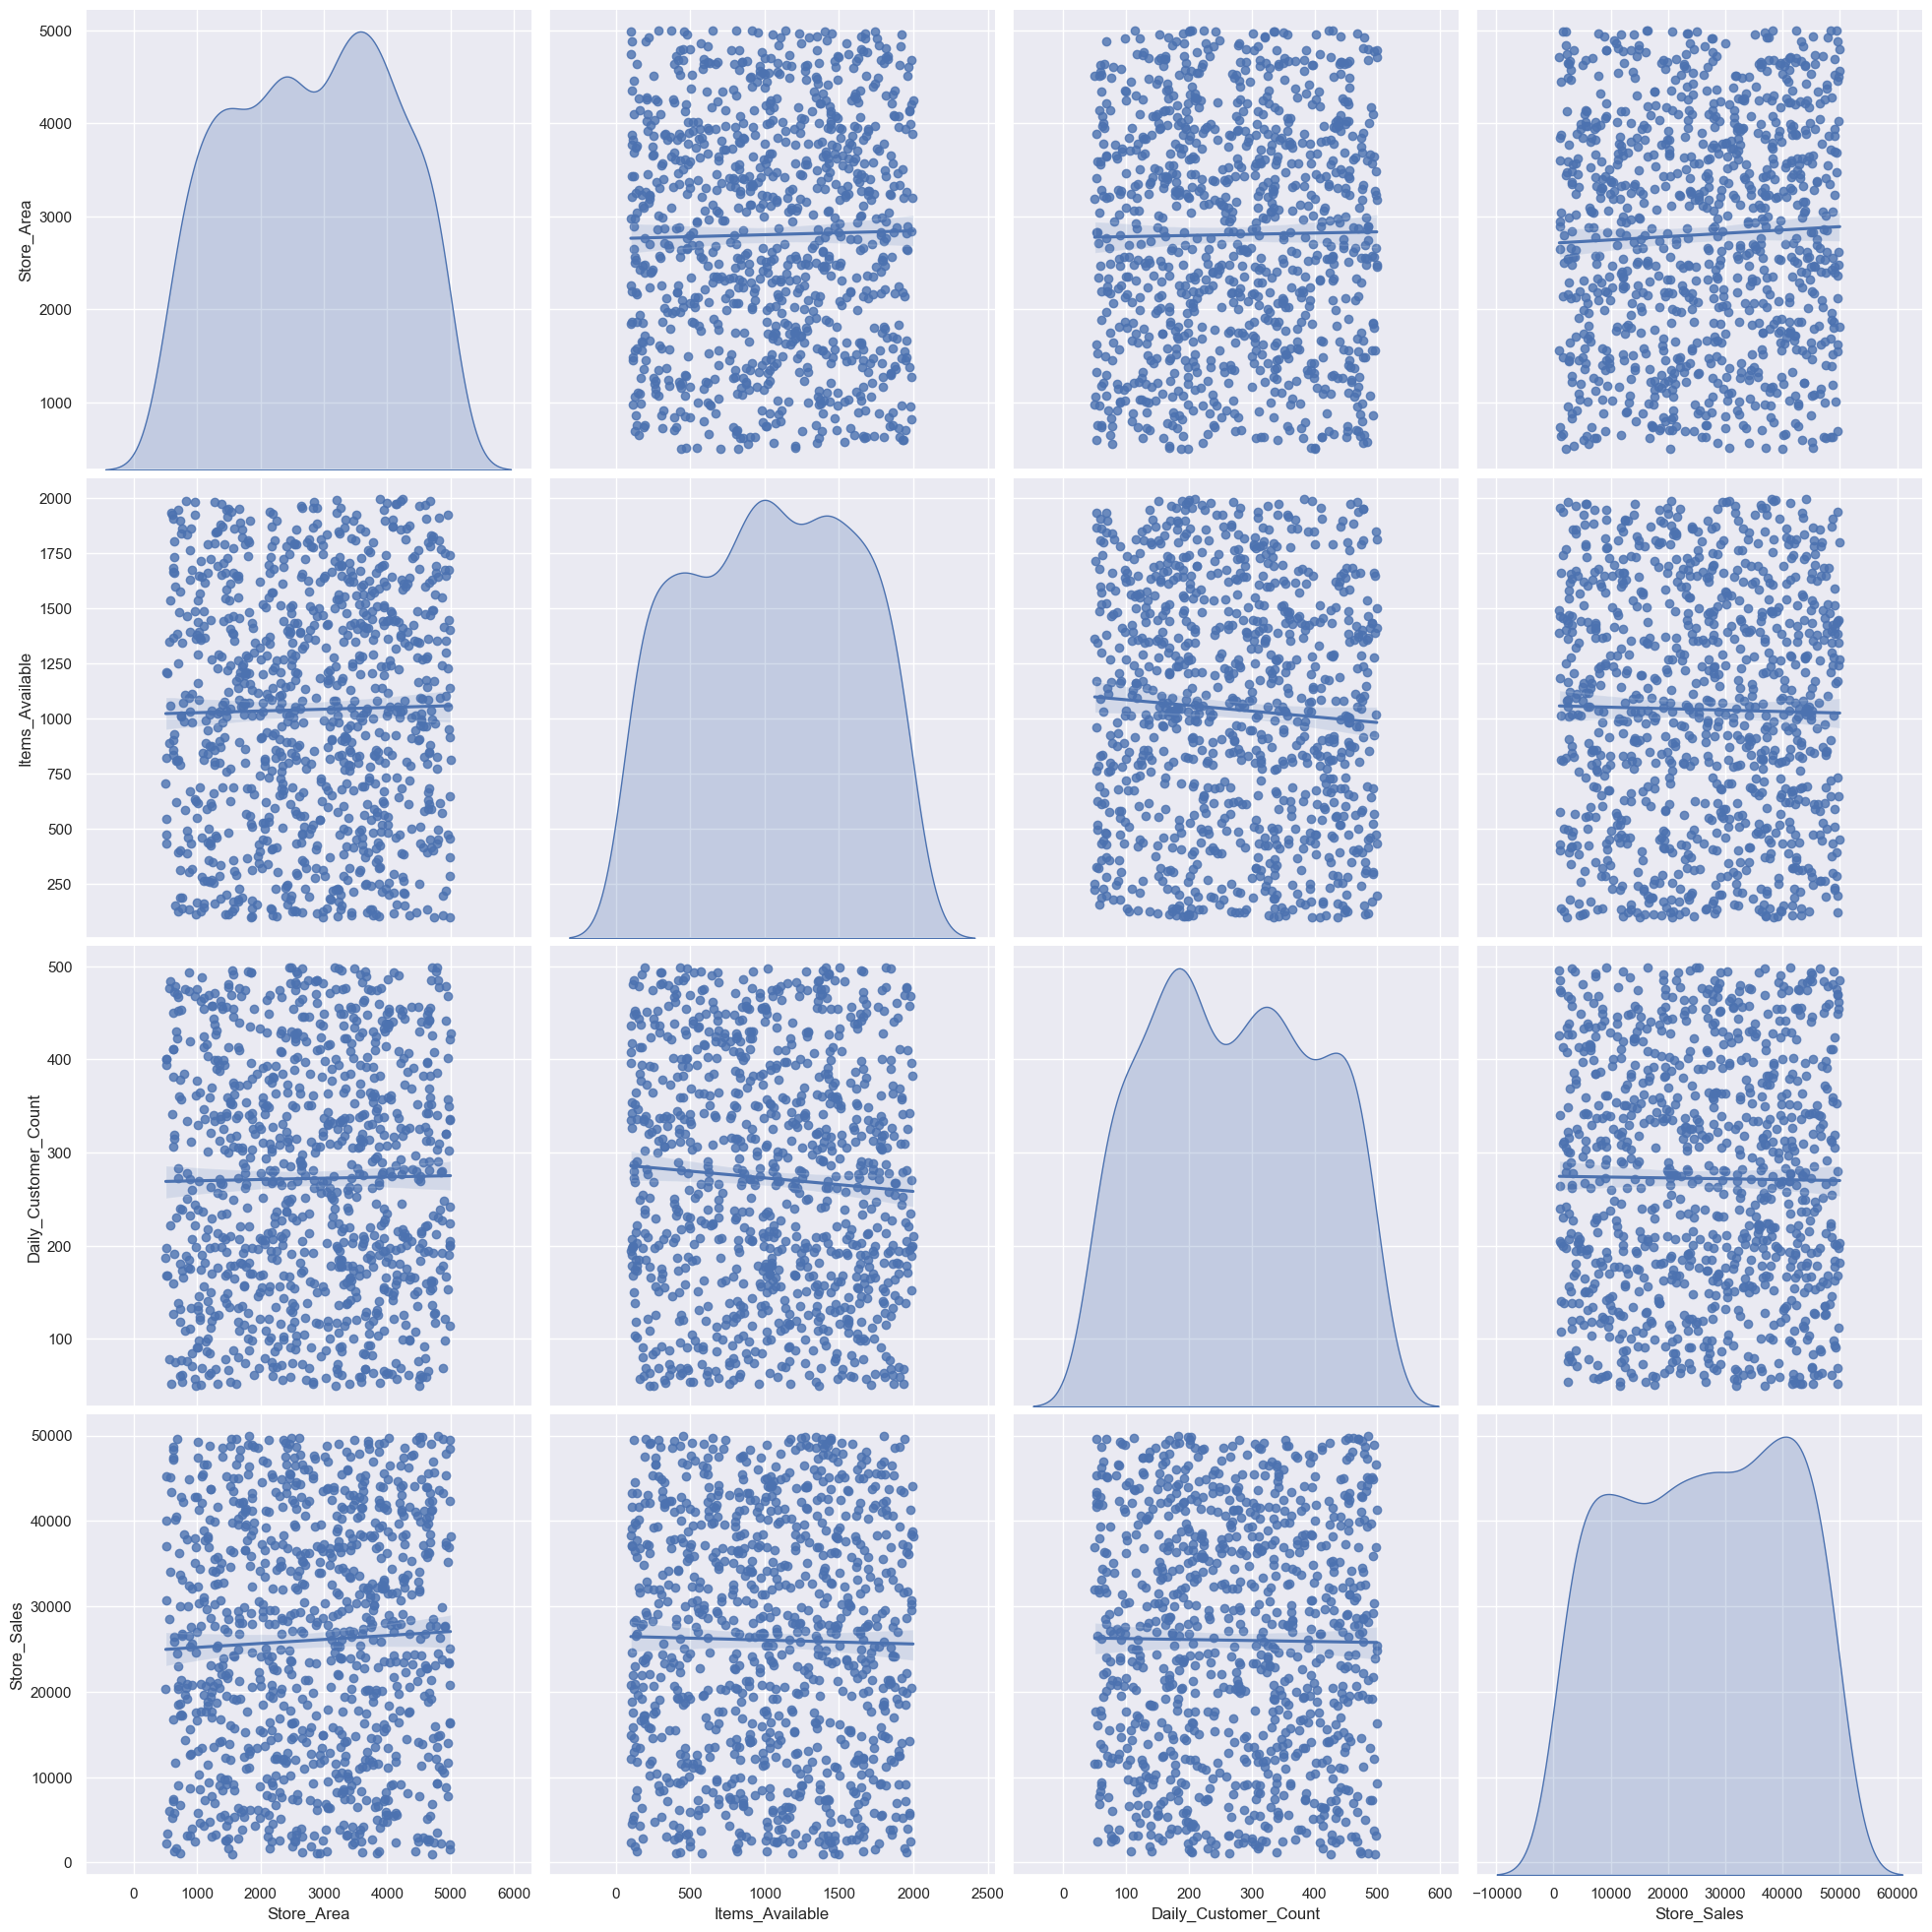

In [39]:
sns.set()
sns.pairplot(df,height = 5, kind = 'reg', diag_kind='kde')
plt.show()

# Analyzing the presence of outliers in the data.No more than 2% of the data should be deleted, meaning no more than 20 lines in the dataset in this case


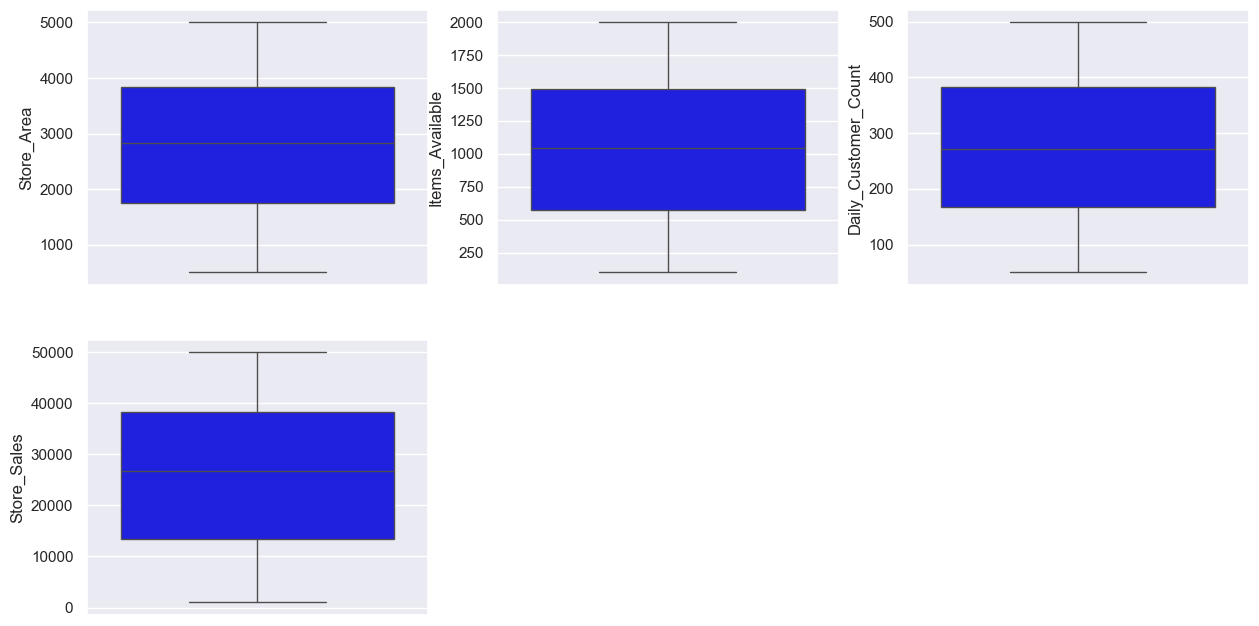

In [40]:
i=1
plt.figure(figsize=(15,25))
for feature in df.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature],color='blue' )
    i+=1

# There are minor outliers in the data, therefore let's carry out correlation analysis of these variable. Selects the top 10 most correlated features with 'Store_Sales', computes their correlation matrix, and visualizes it using a heatmap. The heatmap helps identify relationships between these features for better data analysis

In [41]:
correlation = df.corr()
print(correlation['Store_Sales'].sort_values(ascending= False),'\n')

Store_Sales             1.000000
Store_Area              0.040633
Daily_Customer_Count   -0.010350
Items_Available        -0.017323
Name: Store_Sales, dtype: float64 



Index(['Store_Sales', 'Store_Area', 'Daily_Customer_Count', 'Items_Available'], dtype='object')


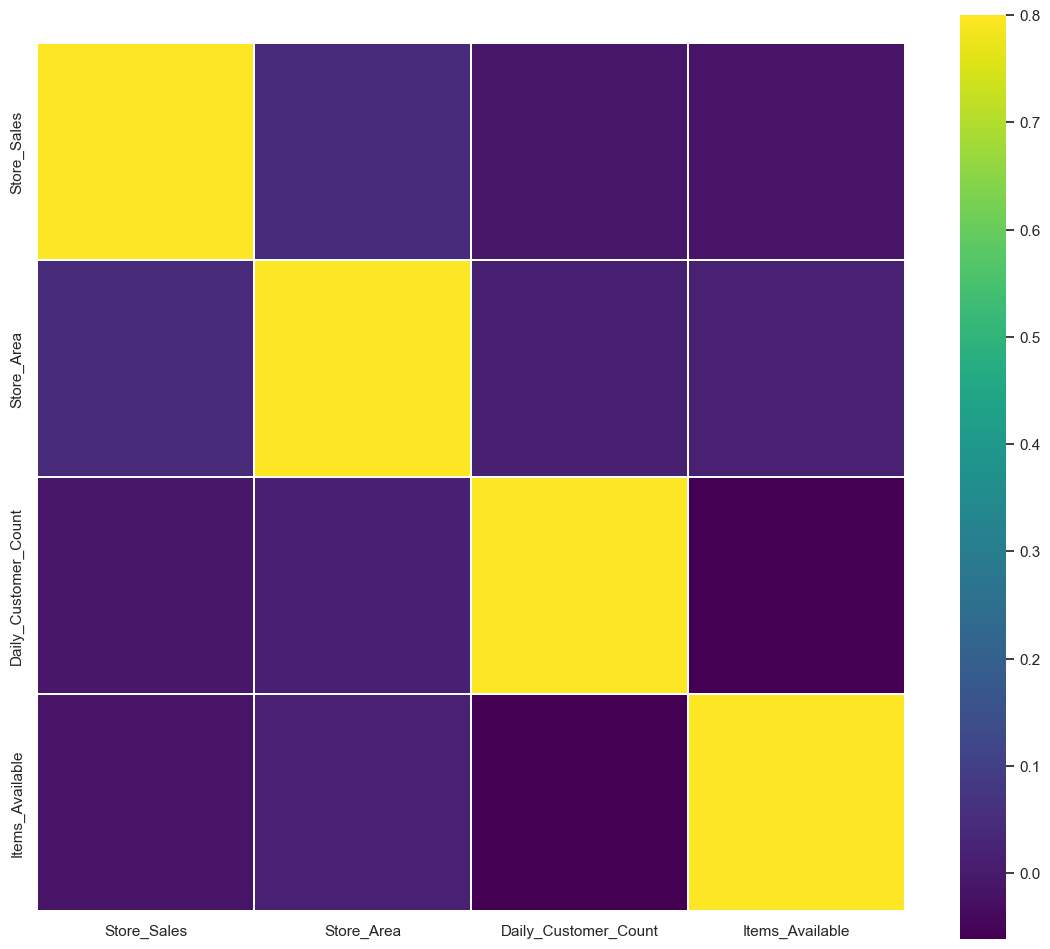

In [42]:
k = 10
cols = correlation.nlargest(k,'Store_Sales')['Store_Sales'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths = 0.01, square = True, cmap = 'viridis',linecolor="white", xticklabels = cols.values, annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

# Dropping the area.

In [43]:
df = df.drop('Store_Area', axis=1)

In [44]:
df

,Items_Available,Daily_Customer_Count,Store_Sales
0,186,336,16783.292207
1,154,444,32188.041901
2,1599,59,8300.987071
3,1923,244,35075.366768
4,1301,167,37550.335232
...,...,...,...
945,559,131,32166.080970
946,1799,452,18853.357683
947,400,208,15466.848322
948,1018,237,44095.331966


# Cluster Analysis. Cluster analysis groups similar data points together based on patterns, helping to identify hidden structures in data.

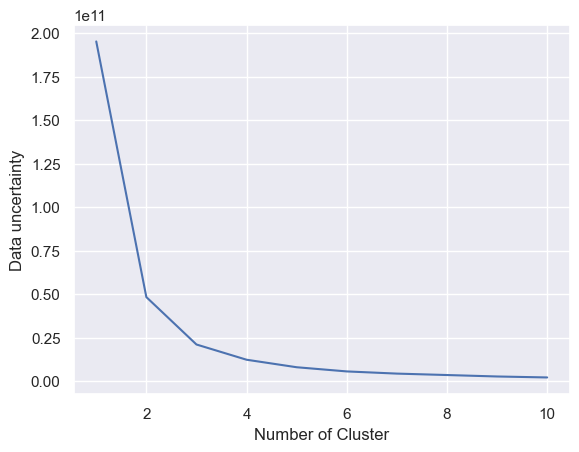

In [45]:
from sklearn.cluster import KMeans
wcss = []                           # Initialize an empty list to store Within-Cluster Sum of Squares (WCSS) values
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)
fig, ax = plt.subplots()

# Loop through cluster numbers from 1 to 10
ax.plot(range(1,11), wcss)
ax.set_xlabel("Number of Cluster")
ax.set_ylabel("Data uncertainty")

plt.show()


In [46]:
# The optimal number of clusters is 2.

# Machine Learning and Data Preprocessing.

In [47]:
from sklearn.neighbors import LocalOutlierFactor            #   # clean the data from the outliers with the condition of not more than 20%

In [48]:
clf = LocalOutlierFactor(n_neighbors=5, contamination='auto')
y_pred = clf.fit_predict(df)

In [49]:
df ['Out'] = y_pred

In [50]:
Out = df[df['Out'] !=1]

In [51]:
Out.shape

(4, 4)

In [52]:
df_2 = df[df['Out'] == 1]

In [53]:
df_2

,Items_Available,Daily_Customer_Count,Store_Sales,Out
0,186,336,16783.292207,1
1,154,444,32188.041901,1
2,1599,59,8300.987071,1
3,1923,244,35075.366768,1
4,1301,167,37550.335232,1
...,...,...,...,...
945,559,131,32166.080970,1
946,1799,452,18853.357683,1
947,400,208,15466.848322,1
948,1018,237,44095.331966,1


# Now Cleaning the data from the outlier is done.

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import xgboost as xgb                             # Extreme Gradient Boosting , Machine Learning algorithm used for classification and regression tasks
from sklearn.ensemble import RandomForestRegressor


In [55]:
y = df_2['Store_Sales']
X = df_2.drop(['Store_Sales','Out'], axis = 1)

In [56]:
X_df, X_test, y_df, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
models = [RandomForestRegressor(), LinearRegression(),ElasticNet(), KNeighborsRegressor(),xgb.XGBRegressor()]
scores = dict()

for m in models:
    m.fit(X_df, y_df)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'RMSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print('-'*30, '\n')

model: RandomForestRegressor()
RMSE: 234166460.66353646
MAE: 12667.074460441076
------------------------------ 

model: LinearRegression()
RMSE: 192126124.89438966
MAE: 11951.827102960788
------------------------------ 

model: ElasticNet()
RMSE: 192126118.90922204
MAE: 11951.826670656235
------------------------------ 

model: KNeighborsRegressor()
RMSE: 233157208.19430846
MAE: 12615.788295296572
------------------------------ 

model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             mi